<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Classification/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
url = "https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=True"
df = pd.read_excel(url, 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
description = pd.read_excel(url, sheet_name='Data Dict', usecols=[1,2,3])
description

,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Data,Variable,Discerption
1,E Comm,CustomerID,Unique customer ID
2,E Comm,Churn,Churn Flag
3,E Comm,Tenure,Tenure of customer in organization
4,E Comm,PreferredLoginDevice,Preferred login device of customer
5,E Comm,CityTier,City tier
6,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,E Comm,Gender,Gender of customer
9,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


| Inglizcha nomi                  | O‘zbekchaga tarjima                                     |
| ------------------------------- | ------------------------------------------------------- |
| **CustomerID**                  | Mijozning noyob identifikatori                          |
| **Churn**                       | Ketgan mijoz flagi (churn belgisi)                      |
| **Tenure**                      | Mijozning kompaniyada bo‘lgan muddati                   |
| **PreferredLoginDevice**        | Mijozning afzal ko‘rgan kirish qurilmasi                |
| **CityTier**                    | Shahar darajasi (kategoriya)                            |
| **WarehouseToHome**             | Ombordan uyga bo‘lgan masofa                            |
| **PreferredPaymentMode**        | Mijozning afzal to‘lov usuli                            |
| **Gender**                      | Jinsi                                                   |
| **HourSpendOnApp**              | Ilovada sarflangan soatlar soni                         |
| **NumberOfDeviceRegistered**    | Ro‘yxatdan o‘tgan qurilmalar soni                       |
| **PreferedOrderCat**            | So‘nggi oyda buyurtma qilingan asosiy toifa             |
| **SatisfactionScore**           | Mijozning xizmatdan qoniqish darajasi                   |
| **MaritalStatus**               | Oilaviy holati                                          |
| **NumberOfAddress**             | Mijoz qo‘shgan manzillar soni                           |
| **Complain**                    | So‘nggi oyda bildirilgan shikoyatlar                    |
| **OrderAmountHikeFromlastYear** | O‘tgan yilga nisbatan buyurtmalar sonining o‘sish foizi |
| **CouponUsed**                  | So‘nggi oyda ishlatilgan kuponlar soni                  |
| **OrderCount**                  | So‘nggi oyda berilgan buyurtmalar soni                  |
| **DaySinceLastOrder**           | So‘nggi buyurtmadan o‘tgan kunlar soni                  |
| **CashbackAmount**              | O‘rtacha cashback miqdori (so‘nggi oyda)                |


In [4]:
df.shape

(5630, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [7]:
print(f"Numbers: {df['Churn'].value_counts()}\nPercentage : {df['Churn'].value_counts()/len(df)*100}")

Numbers: Churn
0    4682
1     948
Name: count, dtype: int64
Percentage : Churn
0    83.161634
1    16.838366
Name: count, dtype: float64


In [8]:
churn_rate = df['Churn'].value_counts()/len(df)*100

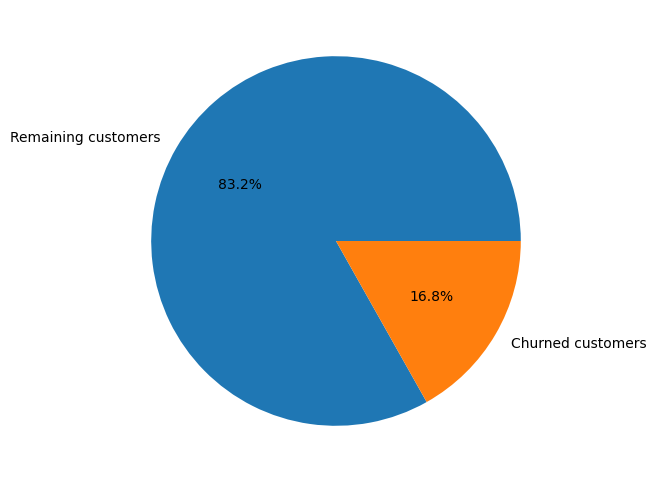

In [9]:
plt.figure(figsize=(6,6))
plt.pie(
    churn_rate,
    labels=['Remaining customers', 'Churned customers'],
    autopct='%1.1f%%'
)
plt.show()

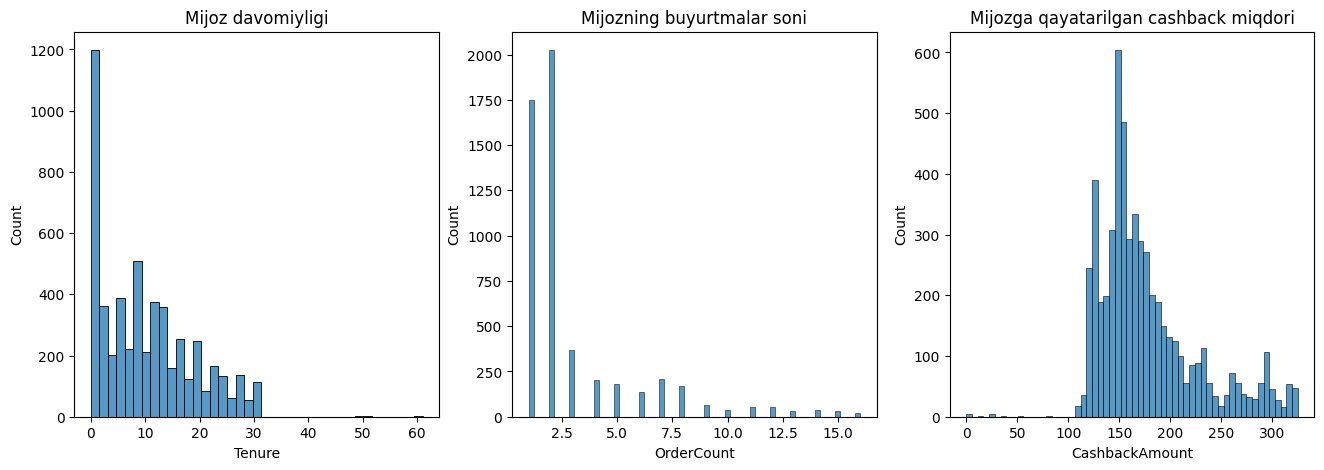

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (16, 5))

sns.histplot(data=df, x='Tenure', ax = axes[0])
axes[0].set_title("Mijoz davomiyligi")

sns.histplot(data=df, x='OrderCount', ax = axes[1])
axes[1].set_title("Mijozning buyurtmalar soni")

sns.histplot(data=df, x='CashbackAmount', ax = axes[2])
axes[2].set_title("Mijozga qayatarilgan cashback miqdori")

plt.show()

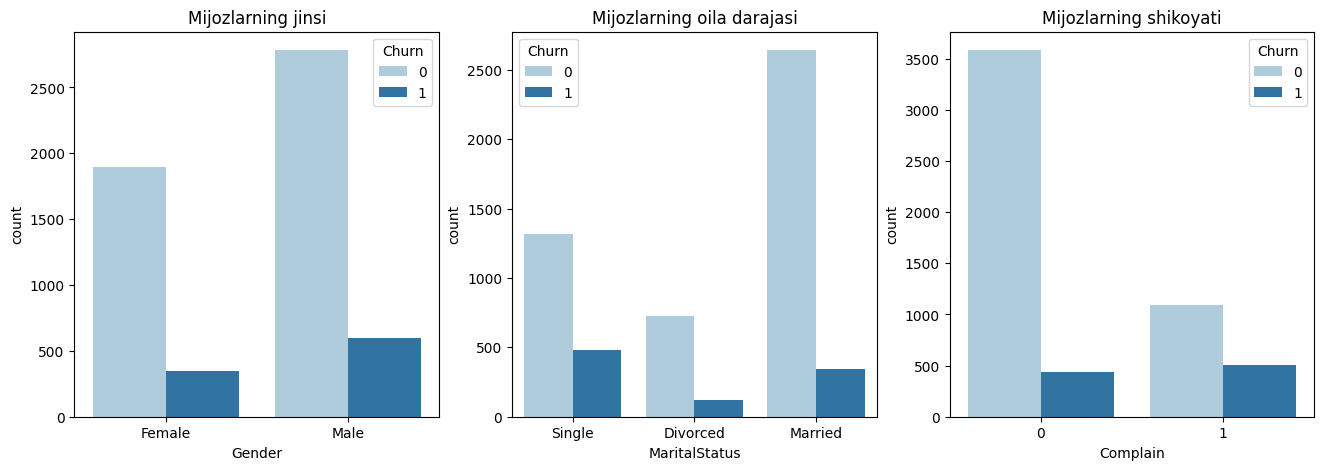

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (16, 5))

sns.countplot(data = df, x = 'Gender', hue = 'Churn', ax = axes[0], palette='Paired')
axes[0].set_title("Mijozlarning jinsi")

sns.countplot(data = df, x = 'MaritalStatus', hue = 'Churn', ax = axes[1], palette='Paired')
axes[1].set_title("Mijozlarning oila darajasi")

sns.countplot(data = df, x = 'Complain', hue = 'Churn', ax = axes[2], palette='Paired')
axes[2].set_title("Mijozlarning shikoyati")

plt.show()

In [12]:
corr_matrix = df.corrwith(df['Churn'], numeric_only=True).abs()
corr_matrix.sort_values(ascending = False)

,0
Churn,1.000000
Tenure,0.349408
Complain,0.250188
DaySinceLastOrder,0.160757
CashbackAmount,0.154118
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703
WarehouseToHome,0.076630
NumberOfAddress,0.043931


In [13]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [14]:
df.isnull().sum().sum() / len(df) * 100

np.float64(32.96625222024866)

In [15]:
data = df[["Churn", 'Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfDeviceRegistered', 'SatisfactionScore']]
data.isnull().sum().sum() / len(df) * 100

np.float64(10.14209591474245)

In [16]:
data = data.dropna()
data.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore
0,1,4.0,1,5.0,159.93,3,2
3,1,0.0,0,3.0,134.07,4,5
4,1,0.0,0,3.0,129.60,3,5
5,1,0.0,1,7.0,139.19,5,5
8,1,13.0,1,2.0,126.83,4,3


In [17]:
data['Churn'].value_counts() / len(data)

,count
Churn,
0,0.839296
1,0.160704


# ML preparation

In [18]:
data = pd.get_dummies(data)
data.sample(10)

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore
4770,0,1.0,1,9.0,253.08,5,1
3262,0,3.0,0,2.0,168.35,4,3
4511,0,6.0,0,8.0,148.70,4,4
2763,0,11.0,0,7.0,153.21,4,3
4191,0,18.0,1,4.0,189.65,4,1
346,0,11.0,0,0.0,198.24,3,3
5478,0,3.0,0,11.0,163.12,4,1
2573,0,14.0,0,2.0,164.30,5,4
438,0,0.0,0,4.0,161.80,3,2
2810,0,9.0,0,3.0,125.71,1,1


In [19]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [21]:
scaler = StandardScaler()

X_full_prepared = scaler.fit_transform(X)
X_train_prepared = scaler.transform(X_train)
X_test_prepared = scaler.transform(X_test)

#ML

### Logistic regression

Classification report : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       873
           1       0.66      0.47      0.55       139

    accuracy                           0.89      1012
   macro avg       0.79      0.72      0.75      1012
weighted avg       0.88      0.89      0.89      1012

Accuraccy score : 0.8942687747035574




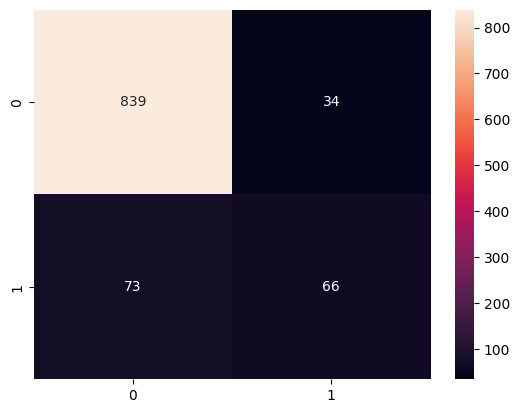

<Figure size 1200x1000 with 0 Axes>

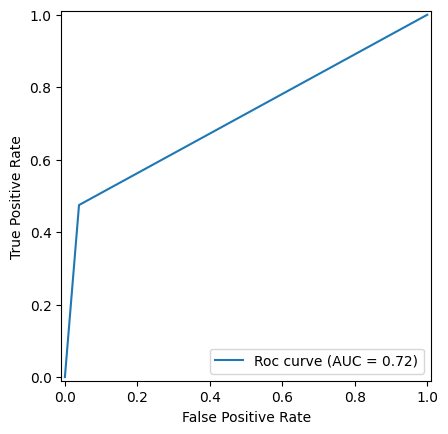

In [25]:
LR_model = LogisticRegression()
LR_model.fit(X_train_prepared, y_train)

y_predict = LR_model.predict(X_test_prepared)

print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

### Support Vector Machine

Classification report : 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       873
           1       0.62      0.46      0.53       139

    accuracy                           0.89      1012
   macro avg       0.77      0.71      0.73      1012
weighted avg       0.88      0.89      0.88      1012

Accuraccy score : 0.8863636363636364




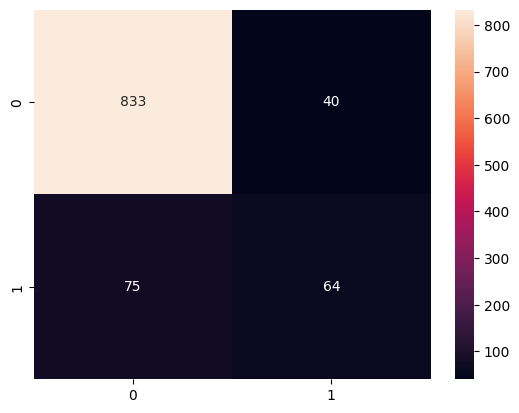

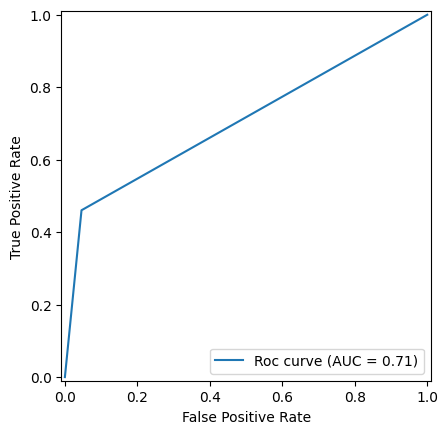

In [27]:
SV_model = SVC()
SV_model.fit(X_train_prepared, y_train)

y_predict = SV_model.predict(X_test_prepared)

print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

### Tree model

Classification report : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       873
           1       0.62      0.61      0.62       139

    accuracy                           0.90      1012
   macro avg       0.78      0.78      0.78      1012
weighted avg       0.89      0.90      0.89      1012

Accuraccy score : 0.8952569169960475




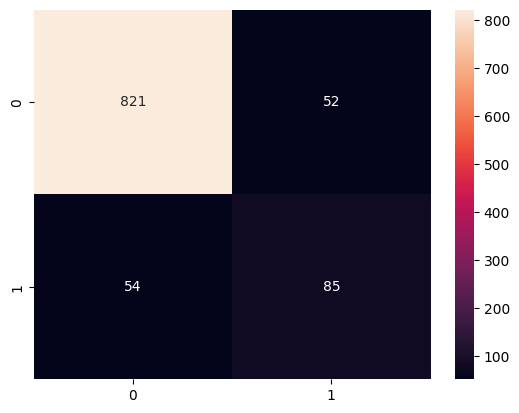

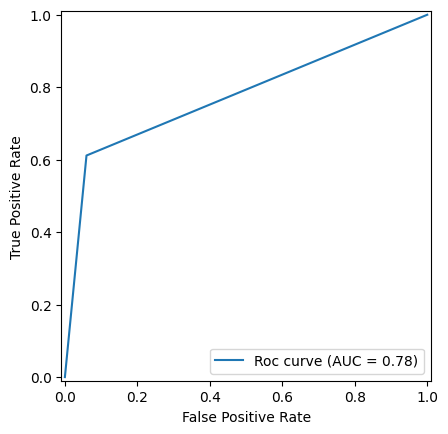

In [33]:
tree_model = DecisionTreeClassifier(max_depth = 5)
tree_model.fit(X_train_prepared, y_train)

y_predict = tree_model.predict(X_test_prepared)

print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

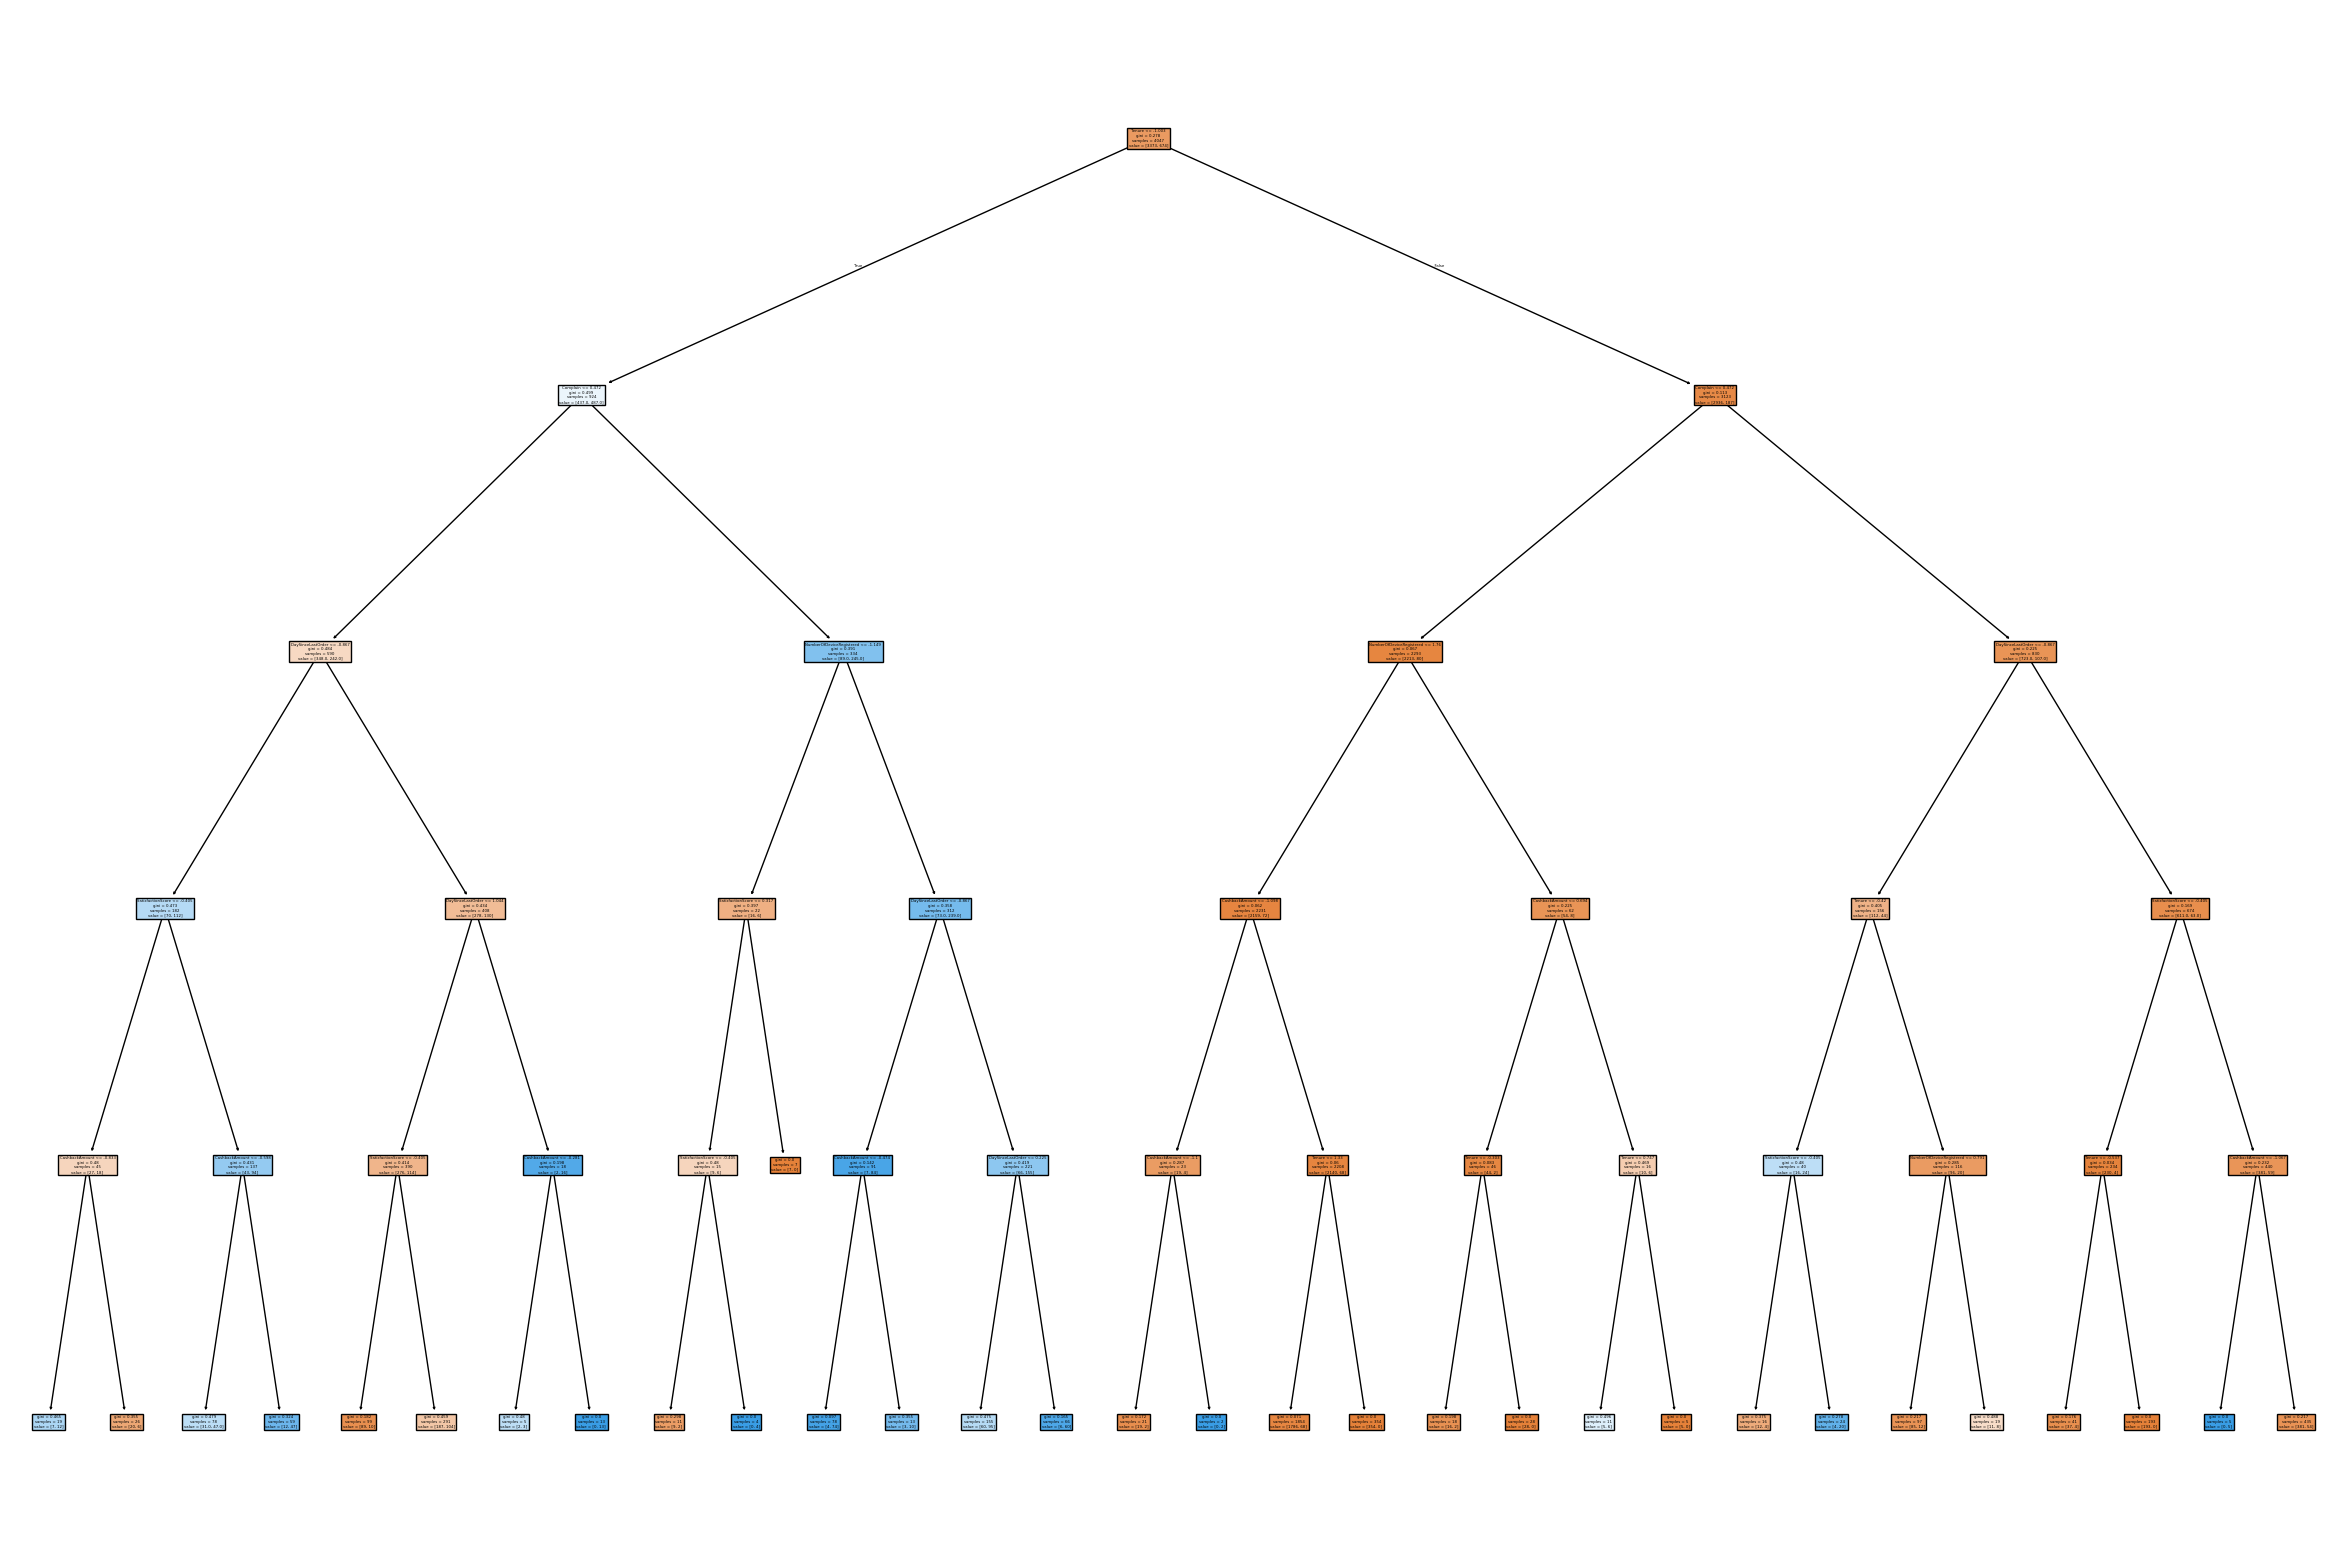

In [34]:
cols = data.drop('Churn', axis = 1).columns

plt.figure(figsize = (30, 20))
plot_tree(tree_model, feature_names=cols, filled = True)
plt.show()

### Random Forest model

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       873
           1       0.81      0.81      0.81       139

    accuracy                           0.95      1012
   macro avg       0.89      0.89      0.89      1012
weighted avg       0.95      0.95      0.95      1012

Accuraccy score : 0.9486166007905138




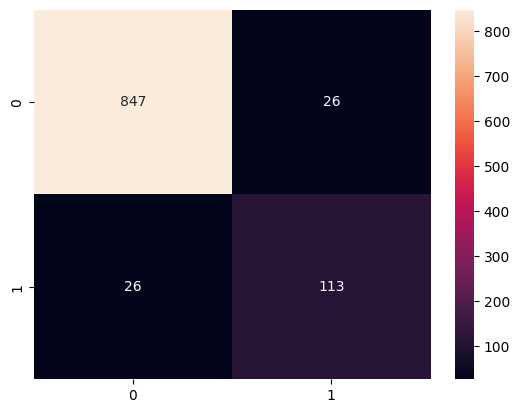

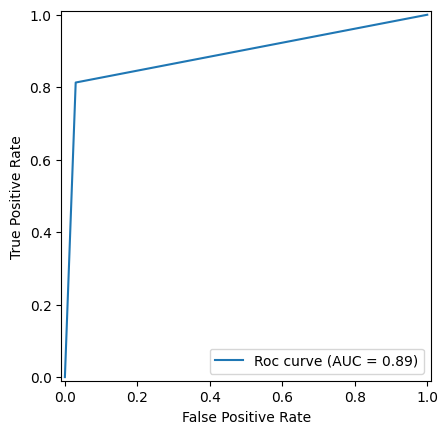

In [35]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train_prepared, y_train)

y_predict = RF_model.predict(X_test_prepared)

print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

### XGBoost model

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       873
           1       0.79      0.81      0.80       139

    accuracy                           0.94      1012
   macro avg       0.88      0.89      0.88      1012
weighted avg       0.95      0.94      0.94      1012

Accuraccy score : 0.9446640316205533




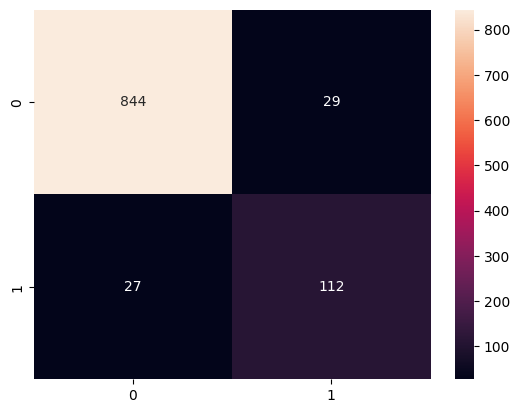

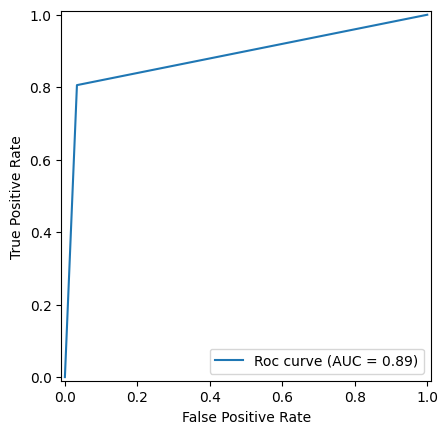

In [36]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_prepared, y_train)

y_predict = xgb_model.predict(X_test_prepared)

print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()